# Иследование данных Яндекс Афиша за осень 2024 г.

- Автор: Горлов Георгий
- Дата: 09.06.2025

### Цели и задачи проекта
Цель проекта: провести для продуктового отдела сервиса Яндекс Афиша исследовательский и статистический анализ данных о мероприятиях и мест их проведения,чтобы выявить новую информацию об изменении пользовательских предпочтений и популярности событий. Датасет составлен на основе данных сервисов Яндекс Афиша на период с 1 июня по 30 октября 2024 года.


### Описание данных
Датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

Датасет `final_tickets_events_df` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Из данных была исключена информация, относящаяся к мероприятиям типа "фильм", т.к. событий такого типа было немного.


Для конвертации валюты был создан датасет `final_tickets_tenge_df.csv` с данными о курсе тенге к российскому рублю. С его помощью будет удобно привести данные к одной валюте.

### Содержимое проекта

1. [Загрузка и знакомство с данными](#1)
2. [Предобработка данных и подготовка их к исследованию](#2)
3. [Исследовательский анализ данных](#3)
    3.1 [Анализ распределения заказов по сегментам и их сезонные изменения](#6)
    3.2 [Осенняя активность пользователей](#7)
    3.3 [Популярные события и партнёры](#8)
4. [Статистический анализ данных](#4)
5. [Общий вывод и рекомендации](#5)

---

<a id='1'></a>
## Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеку pandas
import pandas as pd
# Импортируем библиотеку визуализации
import matplotlib.pyplot as plt
# Импортируем библиотку для проверки гипотез
from scipy.stats import ttest_ind

In [2]:
# Загрузим данные
# Заказы билетов
orders = pd.read_csv(final_tickets_orders_df.csv')
# События
events = pd.read_csv(final_tickets_events_df.csv')
# Курсе тенге
tenge =pd.read_csv(final_tickets_tenge_df.csv') 

In [3]:
# Посмотрим на данные таблицы orders
orders

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN


In [4]:
# Выведим общую информацию о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
# Проверим долю пропущенных значений в столбце days_since_prev
orders.isna().sum()/orders.shape[0]

order_id                 0.000000
user_id                  0.000000
created_dt_msk           0.000000
created_ts_msk           0.000000
event_id                 0.000000
cinema_circuit           0.000000
age_limit                0.000000
currency_code            0.000000
device_type_canonical    0.000000
revenue                  0.000000
service_name             0.000000
tickets_count            0.000000
total                    0.000000
days_since_prev          0.075434
dtype: float64

In [6]:
# Посмотрим на данные таблицы events
events

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"
...,...,...,...,...,...,...,...,...,...,...,...
22422,591313,196f51a8-344a-462a-b806-a8467fd0e5fa,спортивное мероприятие,спорт,№1623,Речиновская область,Дальнесветск,65,3721,"Студия графики ""Оттенок"" Инк","ул. Чапаева, д. 8 стр. 1/3"
22423,591859,b2b83233-f861-496c-b6fb-a4fef347deb1,ёлка,ёлки,№1992,Солнечноземская область,Глинополье,56,3005,"Арт-кафе ""Аксессуар"" Лимитед","бул. Логовой, д. 94 к. 1/5"
22424,591877,6bffa2da-51d1-4cfe-accb-a02e617a8180,событие,другое,№1767,Североключевской округ,Ягодинска,21702,3506,"Клуб современных танцев ""Кофе"" Групп","ш. Тупиковое, д. 49 стр. 73"
22425,592322,9283cb32-2750-43cd-b57e-dde9ccd5552e,событие,другое,№3884,Яблоневская область,Светополье,39,1081,"Искусственная сцена ""Краски"" и партнеры","пер. Р.Люксембург, д. 499 к. 997"


In [7]:
# Выведим общую информацию о таблице events
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [8]:
# Посмотрим на данные таблицы tenge
tenge

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


In [9]:
# Выведим общую информацию о таблице tenge
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


___
### Промежуточный вывод

- Данные таблицы `orders` соответствуют описанию. Есть возможность оптимизировать числовые столбцы, а также привести столбцы с датой и времени к соответствующему типу данных. Cтолбец `days_since_prev` содержит в себе всего 7,5% пустых значений от общего числа.
- Данные таблицы `events` также соответствуют описанию. Можно провести оптимизацию числовых столбцов. Отсутствуют пропуски в таблице.
- Таблица `tenge` содержит в себе курс тенге к рублю за весь 2024 г. Можно оптимизировать числовые столбцы.
___

<a id='2'></a>
## Предобработка данных и подготовка их к исследованию

### Изучение данных ключевых столбцов

- Проверим категориальные столбцы таблиц

In [10]:
# Посмотрим на число уникальных значений категориальных столбцов таблицы orders
for column in ['cinema_circuit','age_limit','currency_code','device_type_canonical','service_name']:
    print(f'Уникальные значения в столбце {column}')
    print(orders[column].nunique())
    print(orders[column].unique(), '\n')

Уникальные значения в столбце cinema_circuit
6
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм'] 

Уникальные значения в столбце age_limit
5
[16  0 18 12  6] 

Уникальные значения в столбце currency_code
2
['rub' 'kzt'] 

Уникальные значения в столбце device_type_canonical
2
['mobile' 'desktop'] 

Уникальные значения в столбце service_name
36
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете'] 



In [11]:
# Посмотри на количество уникальных значений столбцов таблицы orders
orders.nunique()

order_id                 290849
user_id                   21940
created_dt_msk              153
created_ts_msk           280986
event_id                  22446
cinema_circuit                6
age_limit                     5
currency_code                 2
device_type_canonical         2
revenue                   42528
service_name                 36
tickets_count                22
total                     55473
days_since_prev             149
dtype: int64

In [12]:
# Посмотрим на число уникальных значений категориальных столбцов таблицы events
for column in ['event_type_description','event_type_main']:
    print(f'Уникальные значения в столбце {column}')
    print(events[column].nunique())
    print(events[column].unique(), '\n')

Уникальные значения в столбце event_type_description
20
['спектакль' 'балет' 'мюзикл' 'опера' 'концерт' 'шоу' 'ёлка'
 'цирковое шоу' 'событие' 'фестиваль' 'спортивное мероприятие' 'выставка'
 'спорт' 'оперетта' 'экскурсия' 'рок-мюзикл' 'музыкальный спектакль'
 'снегурочка' 'подарок' 'кукольный спектакль'] 

Уникальные значения в столбце event_type_main
7
['театр' 'концерты' 'ёлки' 'другое' 'стендап' 'выставки' 'спорт'] 



In [13]:
# Посмотри на количество уникальных значений столбцов таблицы events
events.nunique()

event_id                  22427
event_name                15248
event_type_description       20
event_type_main               7
organizers                 4293
region_name                  81
city_name                   352
city_id                     353
venue_id                   3225
venue_name                 3217
venue_address              3225
dtype: int64

In [14]:
# Количество уникальных значений столбцов таблицы tenge
tenge.nunique()

data       357
nominal      1
curs       248
cdx          1
dtype: int64

- Подготовим новую таблицу для упрощения процесса предобратоки данных

In [15]:
# Объединим таблицы в единый датафрейм для предобработки данных
merged_df = orders.merge(events,on='event_id',how='left')
merged_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,74883818-57a6-494a-b162-bb0260877cbf,спектакль,театр,№4837,Каменевский регион,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68"
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,6f4c6a50-0106-407b-8f54-332c740b01da,шоу,стендап,№998,Широковская область,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4"


In [16]:
# Посмотрим на название столбцов нового датафрейма
merged_df.columns

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address'],
      dtype='object')

- Посмотрим на количественные данные. Начнём с данных, в которых заказ оплачивался __рублями__. Посмотрим на распределение данных и наличие выбросов.

In [17]:
# Образуем новую таблицу с заказми, оплаченными рублями
rub_df = merged_df[merged_df['currency_code']=='rub']

In [18]:
# Посмотрим на центральные метрики и квартили
rub_df[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,285780.000000,285780.000000
mean,547.568333,2.754077
std,871.524559,1.171419
min,-90.760000,1.000000
25%,113.827500,2.000000
50%,346.100000,3.000000
75%,791.700000,4.000000
max,81174.540000,57.000000


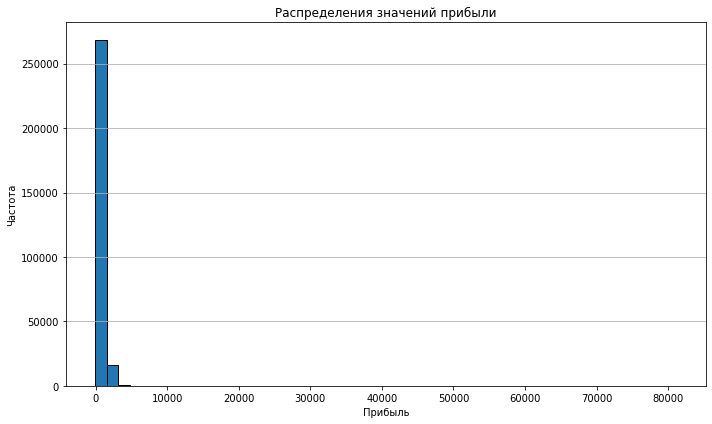

In [19]:
# Строим гистрограмму распределения значений столбца revenue 
rub_df['revenue'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 50,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

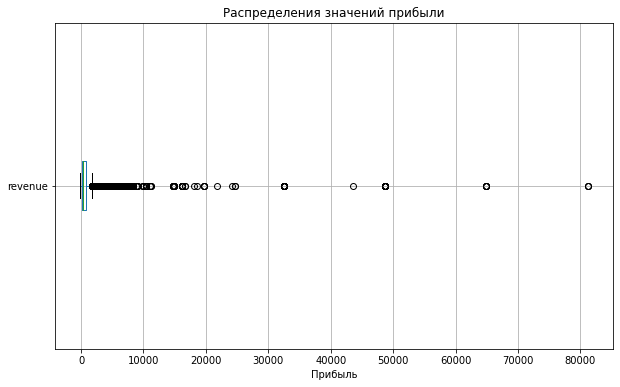

In [20]:
# Диаграмма размаха с выбросами для столбца revenue
rub_df.boxplot(column = 'revenue',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

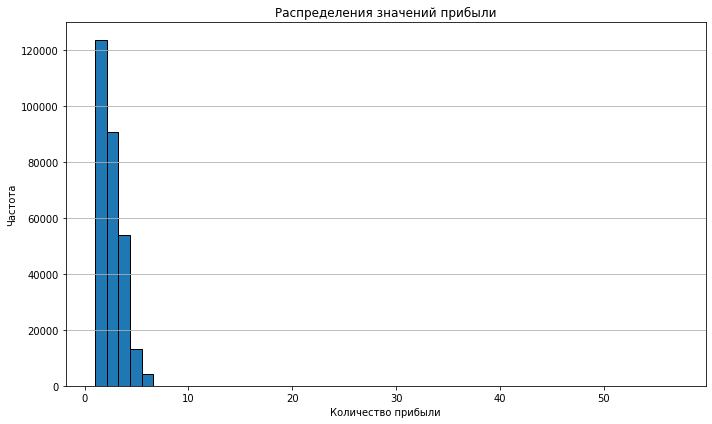

In [21]:
# Строим гистрограмму распределения значений столбца tickets_count
rub_df['tickets_count'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 50,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Количество прибыли')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

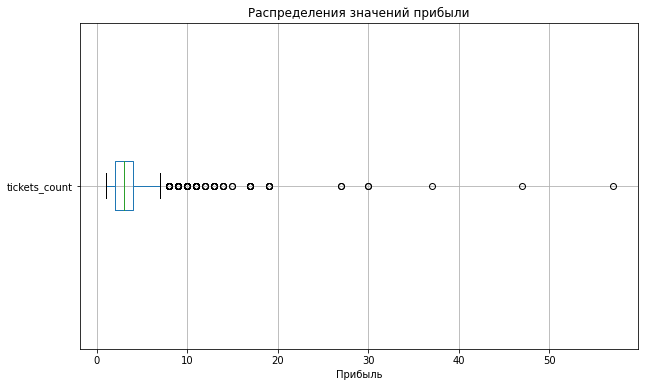

In [22]:
# Диаграмма размаха с выбросами для столбца tickets_count
rub_df.boxplot(column = 'tickets_count',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

Большое количество выбросов. Отобразим диаграмм, отфильтровав столбецы revenue и tickets по 99% квантилю.

In [23]:
rub_df = rub_df[(rub_df['revenue'] < rub_df['revenue'].quantile(0.99))&(rub_df['tickets_count'] < rub_df['tickets_count'].quantile(0.99))]

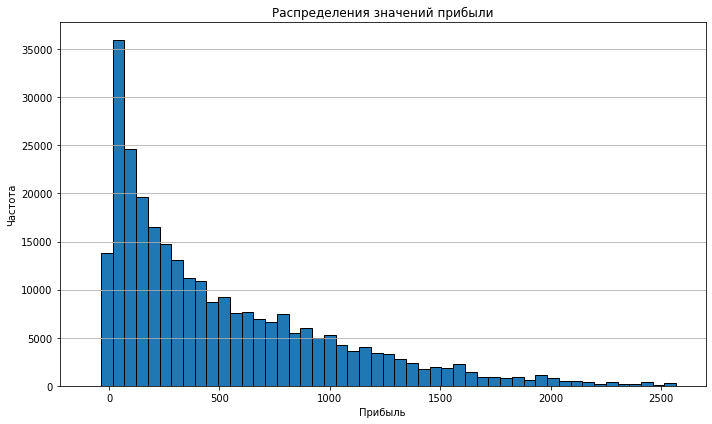

In [24]:
# Строим гистрограмму распределения значений столбца revenue 
rub_df['revenue'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 50,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

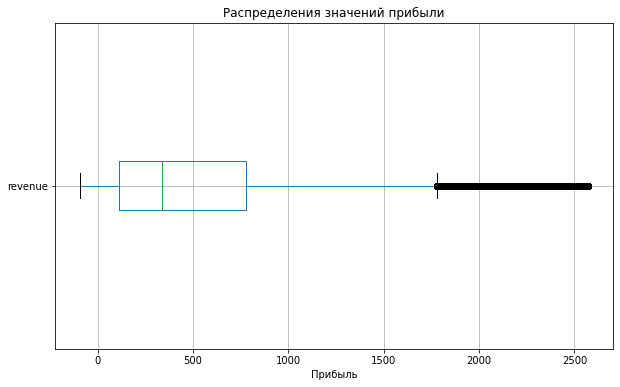

In [25]:
# Диаграмма размаха с выбросами
rub_df.boxplot(column = 'revenue',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

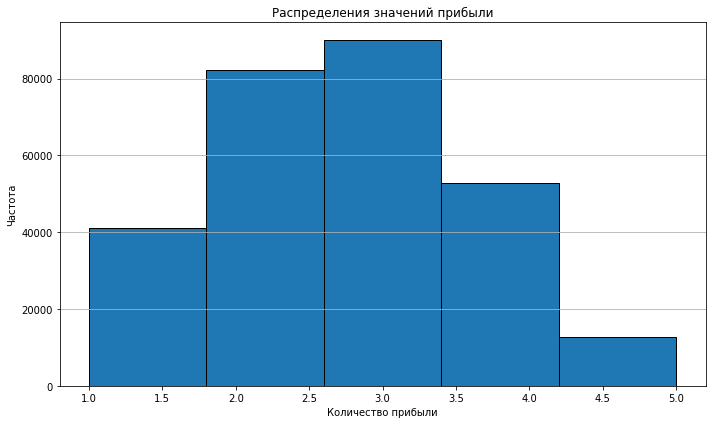

In [26]:
# Строим гистрограмму распределения значений столбца tickets_count
rub_df['tickets_count'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 5,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Количество прибыли')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

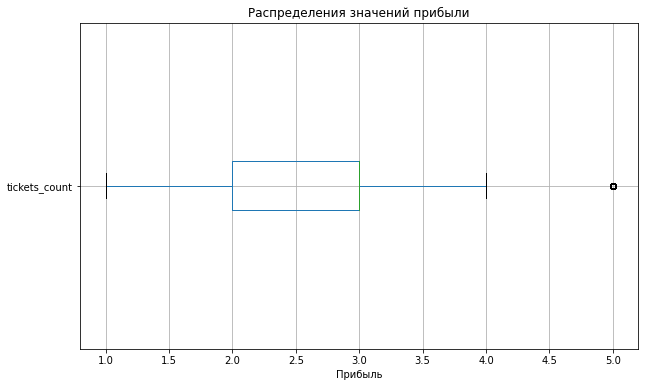

In [27]:
# Диаграмма размаха с выбросами
rub_df.boxplot(column = 'tickets_count',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

- Проведём тоже самое с данными, где указана валюта `kzt` или __тенге__

In [28]:
# Образуем новую таблицу с заказми, оплаченными тенге
kzt_df = merged_df[merged_df['currency_code']=='kzt']

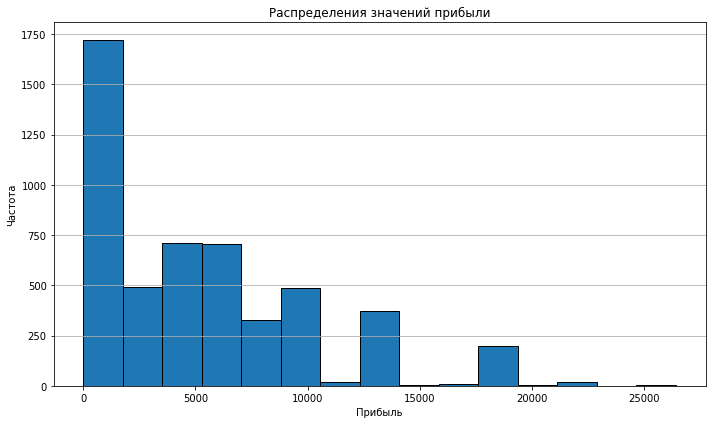

In [29]:
# Строим гистрограмму распределения значений столбца revenue 
kzt_df['revenue'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 15,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

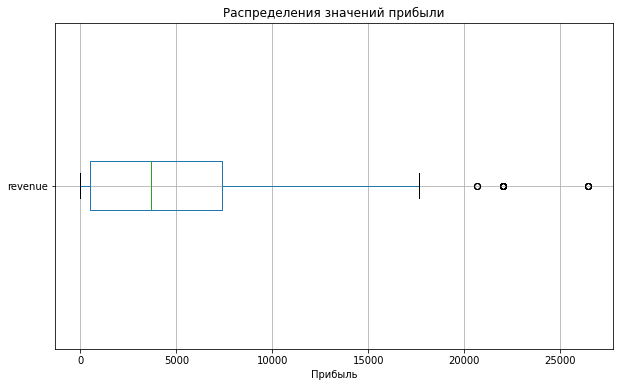

In [30]:
# Диаграмма размаха с выбросами
kzt_df.boxplot(column = 'revenue',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

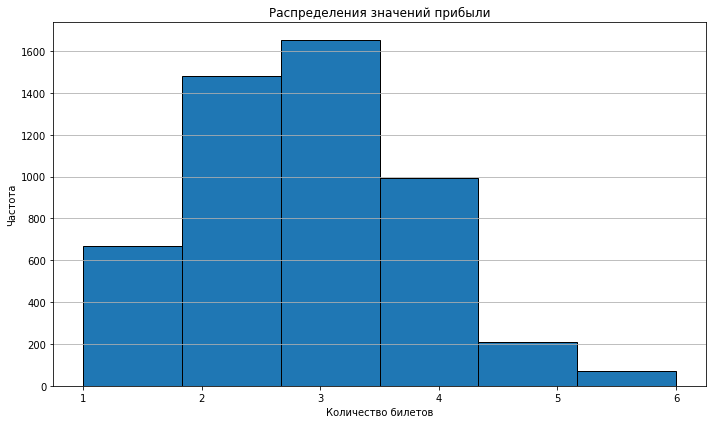

In [31]:
# Строим гистрограмму распределения значений столбца tickets_count 
kzt_df['tickets_count'].plot(kind = 'hist',
                edgecolor = 'black',
                bins = 6,
                figsize = (10,6),
                title = 'Распределения значений прибыли')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.tight_layout()
plt.grid(axis='y')

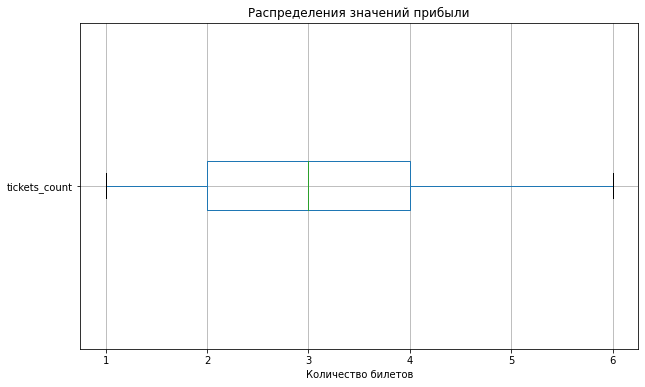

In [32]:
# Диаграмма размаха с выбросами
kzt_df.boxplot(column = 'tickets_count',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Количество билетов')
plt.show()

В заказах, оплаченных тенге, имеются выбросы в выручке. При этом выбросов в количестве билетов не было обнаружено.
Отфильтруем выручку заказов через тенге по 99% квантилю.

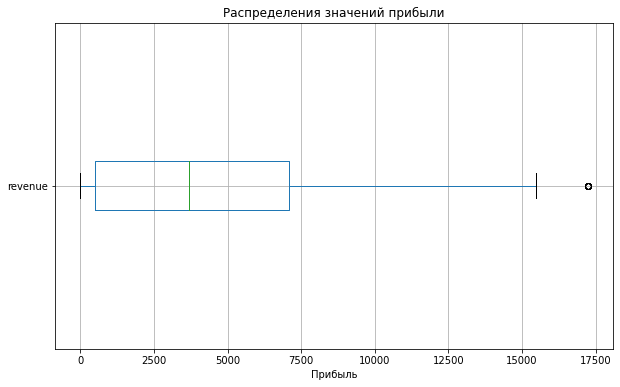

In [33]:
# Отфильтруем данные по 99% квантилю
kzt_df = kzt_df[kzt_df['revenue']<kzt_df['revenue'].quantile(0.99)]
# Диаграмма размаха с выбросами
kzt_df.boxplot(column = 'revenue',vert = False, figsize = (10,6))
plt.title('Распределения значений прибыли')
plt.xlabel('Прибыль')
plt.show()

- Отфильтруем основной датасет по квантилям для каждой валюты

In [34]:
# Подсчитаем изначальное количество строк
first_row = merged_df.shape[0]

In [35]:
# Отфильтруем таблицу по условию
merged_df = merged_df[((merged_df['currency_code']=='rub') | (merged_df['currency_code']=='kzt')) & 
                      (merged_df['revenue']<merged_df['revenue'].quantile(0.99)) & 
                    (merged_df['tickets_count']<merged_df['tickets_count'].quantile(0.99))].reset_index()
#Подсчитаем получившееся количество строк
final_row = merged_df.shape[0]
# Посчитаем разницу между количеством строк
row_diff = first_row - final_row
print(f'Количество отфильтрованных строк: {row_diff}')

Количество отфильтрованных строк: 7307


In [36]:
# Уберем столбец со старыми индексами
merged_df = merged_df.iloc[:,1:]
# Посмотрим на получившуюся таблицу
merged_df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

### Поиск дубликатов

 - Начнём поиск явных и неявных дубликатов.
 

In [37]:
# Найдем явные дубликаты
merged_df.duplicated().sum()

0

In [38]:
# Найдем неявные дубликаты сред всех столбцов, относящихся к оформлению заказа, кроме индификатора заказа
column_list = orders.columns.to_list()
column_list.remove('order_id')

In [39]:
# Посмотрим на строки дубликатов
duplicates = merged_df[merged_df[column_list].duplicated()]

In [40]:
print(f'Количество дубликатов: {merged_df[column_list].duplicated().sum()}')

Количество дубликатов: 30


In [41]:
# Посмотрим на количество уникальных пользователей в дублирующихся строках
duplicates['user_id'].nunique()

20

В 30 дублирующихся строк только 20 уникальных пользователей. Это может означать 10 однотипных заказов от одного пользователя.

In [42]:
# Посмотрим на данные дублирующихся пользователей
duplicates[duplicates['user_id'].duplicated()]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
150208,5373179,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
151005,3463819,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579,нет,0,rub,mobile,2.54,...,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,Североярская область,Озёрск,2.0,4607.0,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"
152200,6657995,7eb4fc207ecc10f,2024-10-26,2024-10-26 09:39:03,418836,нет,0,rub,mobile,294.85,...,a4478837-4631-4e28-95d7-a4c26751a232,цирковое шоу,другое,№1703,Тепляковская область,Горнодолинск,43.0,4481.0,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"
222827,2767964,c2c6d35ff678ca6,2024-08-06,2024-08-06 13:26:42,379268,нет,0,rub,mobile,108.77,...,b16a8d23-6085-4b04-8b8a-35b74a3d89f2,событие,другое,№2685,Североярская область,Озёрск,2.0,1283.0,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9"
225829,4569444,c68f202c21433f7,2024-10-09,2024-10-09 13:58:41,578715,нет,12,rub,mobile,38.21,...,6fbfcff4-a4ef-4441-888a-2b5bfcf10912,событие,другое,№1764,Североключевской округ,Зоречанск,1092.0,1768.0,"Театр ""Задор"" Инкорпорэйтед","пер. Боровой, д. 1 стр. 75"
225844,2410887,c68f202c21433f7,2024-10-16,2024-10-16 17:20:16,469657,нет,6,rub,mobile,12.64,...,d14300fe-85a9-4458-8d9d-eaf0bf7c6295,спектакль,театр,№1763,Североключевской округ,Зоречанск,1092.0,2474.0,"Образовательное учреждение искусства ""Кубок"" Инк","бул. Пролетарский, д. 332"
231789,6597994,cbe06d8837e87fb,2024-10-01,2024-10-01 11:11:17,574431,нет,0,rub,desktop,155.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,Медовская область,Радужсвет,47.0,2157.0,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"
278415,8548070,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:50,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,Каменевский регион,Глиногорск,213.0,4017.0,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
278416,8548099,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,Каменевский регион,Глиногорск,213.0,4017.0,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
278419,8547867,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,1319.43,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,Каменевский регион,Глиногорск,213.0,4017.0,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"


In [43]:
# Число дублирующихся пользователей
duplicates[duplicates['user_id'].duplicated()]['user_id'].nunique()

5

Из 30 дублирующихся строк, 10 строк принадлежат 5 пользователям с повторяющимися заказами.
По скольку в проекте планирутся статистический анализ данных, то присутствие дубликатов может нарушить принцип непересечения данных и исказить результаты. Избавимся от дубликатов из таблицы.

In [44]:
# Удаляем дубликаты из таблицы
merged_df = merged_df.drop_duplicates(subset=column_list)
# Вычисляем сколько 
second_final_row = merged_df.shape[0]
row_diff = final_row - second_final_row
print(f'Количество отфильтрованных строк: {row_diff}, количество строк до удаления: {final_row}, количество после: {second_final_row}')

Количество отфильтрованных строк: 30, количество строк до удаления: 283542, количество после: 283512


### Преобразование типов данных

In [45]:
#Посмотрим на тип данных таблицы
merged_df.dtypes

order_id                    int64
user_id                    object
created_dt_msk             object
created_ts_msk             object
event_id                    int64
cinema_circuit             object
age_limit                   int64
currency_code              object
device_type_canonical      object
revenue                   float64
service_name               object
tickets_count               int64
total                     float64
days_since_prev           float64
event_name                 object
event_type_description     object
event_type_main            object
organizers                 object
region_name                object
city_name                  object
city_id                   float64
venue_id                  float64
venue_name                 object
venue_address              object
dtype: object

In [46]:
# Оптимизируем тип данных для целочисленных столбцов
for column in ['order_id', 'event_id', 'age_limit', 'tickets_count']:
    merged_df.loc[:,column] = pd.to_numeric(merged_df[column], downcast='integer')
# Оптимизируем тип данных для вещественных столбцов
for column in ['revenue', 'total', 'days_since_prev', 'city_id', 'venue_id']:
    merged_df.loc[:,column] = pd.to_numeric(merged_df[column], downcast='float')

In [47]:
# Меняем тип данных для столбцов с датой и датой и временем
merged_df.loc[:, 'created_dt_msk'] = pd.to_datetime(merged_df['created_dt_msk'])
merged_df.loc[:, 'created_ts_msk'] = pd.to_datetime(merged_df['created_ts_msk'],format = '%Y-%m-%d %H:%M:%S')

In [48]:
# Проверяем результат
merged_df.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float32
service_name                      object
tickets_count                       int8
total                            float32
days_since_prev                  float32
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                          float32
venue_id                         float32
venue_name                        object
venue_address                     object
dtype: object

### Создание дополнительных столбцов

- Добавим столбец `revenue_rub` для заказов с прибылью в тенге

In [49]:
# Посмотрим на таблицу tenge
tenge.head(5)

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [50]:
# Создадим новую таблицу для объединения
new_tenge = tenge.loc[:,['data','curs']]

In [51]:
# Переименуем столбец для объединения
new_tenge.rename(columns={'data':'created_dt_msk'},inplace=True)

In [52]:
# Меняем тип данных столбца
new_tenge.loc[:, 'created_dt_msk'] = pd.to_datetime(new_tenge['created_dt_msk'])

In [53]:
# Объединим таблицы 
merged_df = pd.merge(merged_df,new_tenge,on='created_dt_msk',how='left')

In [54]:
# Создадим новый столбец revenue_rub
merged_df['revenue_rub'] = merged_df.apply(
    lambda row: (row['revenue']/100)*row['curs'] if row['currency_code'] == 'kzt' else row['revenue'], 
    axis=1
)

In [55]:
# Проверим заказы в тенге
merged_df[merged_df['currency_code']=='kzt'].head(3)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub
73,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,...,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",19.0125,98.503758
92,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,...,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",18.9330,65.731588
99,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,...,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",18.5991,61.148259


- Добавим столбец `one_ticket_revenue_rub`

In [56]:
# Добавляем новый столбец
merged_df['one_ticket_revenue_rub'] = merged_df['revenue_rub']/merged_df['tickets_count']

In [57]:
# Проверяем подсчёты
merged_df.head(3)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487


- Добавим столбец `month` месяца оформления заказа

In [58]:
# Создаем новый столбец со значением месяца
merged_df['month'] = merged_df['created_dt_msk'].dt.month

In [59]:
# Посмотрим на данные
merged_df.head(3)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487,10


- Добавим столбец `season` с информацией о сезонности  

In [60]:
# Создадим новый столбец season
merged_df['season'] = merged_df['month'].apply(
    lambda x: 'зима' if x in (12,1,2) else('весна' if x in (3,4,5) 
                                           else ('лето' if x in (6,7,8) else 'осень')))

In [61]:
# Проверим данные
merged_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034,463.470011,10,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283507,368591,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:54:52,33189,нет,6,rub,mobile,965.570007,...,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",19.9266,965.570007,241.392502,10,осень
283508,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.570007,...,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",19.9266,965.570007,241.392502,10,осень
283509,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.949997,...,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68",19.9516,178.949997,89.474998,10,осень
283510,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.530029,...,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4",19.3967,661.530029,330.765015,9,осень


In [62]:
# Оптимизируем данные в новых столбцах
for column in ['curs', 'revenue_rub', 'one_ticket_revenue_rub']:
    merged_df.loc[:,column] = pd.to_numeric(merged_df[column], downcast='float')
merged_df.loc[:,'month'] = pd.to_numeric(merged_df['month'], downcast='integer')

In [63]:
print(f'''Изначальное количество строк: {first_row}\n
Окончательное количество строк: {merged_df.shape[0]}\n 
Отфильтровано строк: {first_row - second_final_row}\n
Относительное количество отфильтрованных строк: {round((first_row - second_final_row)/first_row*100,2)} %''')

Изначальное количество строк: 290849

Окончательное количество строк: 283512
 
Отфильтровано строк: 7337

Относительное количество отфильтрованных строк: 2.52 %


___
### Промежуточный вывод
После предобработки данных можно сделать следующие выводы:
- Таблицы orders и events были отфильтрованы по 99% квантилю по нескольким столбцам. С помощью этого удалось избавиться от сверх высоких значений в ключевых числовых столбцах.
- В таблице orders было найдено 30 дубликатов в столбцах, связанных с оформление заказа, не включая  столбец индификатора заказа. Был принято решение удалить дубликаты для предотвращения искажения статистического и исследовательского анализов.
- Суммарное количество удаленных строк состовляет 7337 или 2,5% от первоначального количества.
- Были преобразованы типа данных изначальных столбцов, а также новосозданных. 
- Были успешно созданы дополнительные столбцы с выручкой в рублях для всех заказов, с месяцем заказа и с сезоном года, в котором был оформлен заказ.
___

<a id='3'></a>
## Исследовательский анализ данных

<a id='6'></a>
### Анализ распределения заказов по сегментам и их сезонные изменения

- Проведём анализ динамики пользовательской активности в разрезе категорий

In [64]:
# Сргуппируем данные по типу события 
event_type_gp = merged_df.groupby(['event_type_main','month']).agg({'order_id':'count'})
event_type_gp

order_id
event_type_main month          
выставки        6           611
                7          1009
                8           781
                9           844
                10         1580
другое          6          8724
                7         11398
                8         11736
                9         14285
                10        18321
концерты        6         13772
                7         16688
                8         18424
                9         24855
                10        37798
спорт           6           258
                7           692
                8          1977
                9          7806
                10        10576
стендап         6          1488
                7          2120
                8          2642
                9          2996
                10         3812
театр           6          7319
                7          8173
                8          8328
                9         17507
                10        24841
ёлки            6            67
                7            63
                8           140
                9           331
                10         1313

In [65]:
# Сргуппируем данные по типу устройства 
device_type_gp = merged_df.groupby(['device_type_canonical','month']).agg({'order_id':'count'})
device_type_gp

order_id
device_type_canonical month          
desktop               6          6210
                      7          7910
                      8          8196
                      9         13166
                      10        20680
mobile                6         26207
                      7         32239
                      8         35863
                      9         55469
                      10        77572

In [66]:
# Сргуппируем данные по возростному ограничению
age_limit_gp = merged_df.groupby(['age_limit','month']).agg({'order_id':'count'})
age_limit_gp

order_id
age_limit month          
0         6          5550
          7          6529
          8          8990
          9         15590
          10        23309
6         6          5994
          7          7817
          8          7823
          9         12761
          10        16877
12        6          6854
          7          7599
          8          8735
          9         15698
          10        21178
16        6          9367
          7         11683
          8         11953
          9         17535
          10        26535
18        6          4652
          7          6521
          8          6558
          9          7051
          10        10353

- Изучим распределение заказов по месяцам

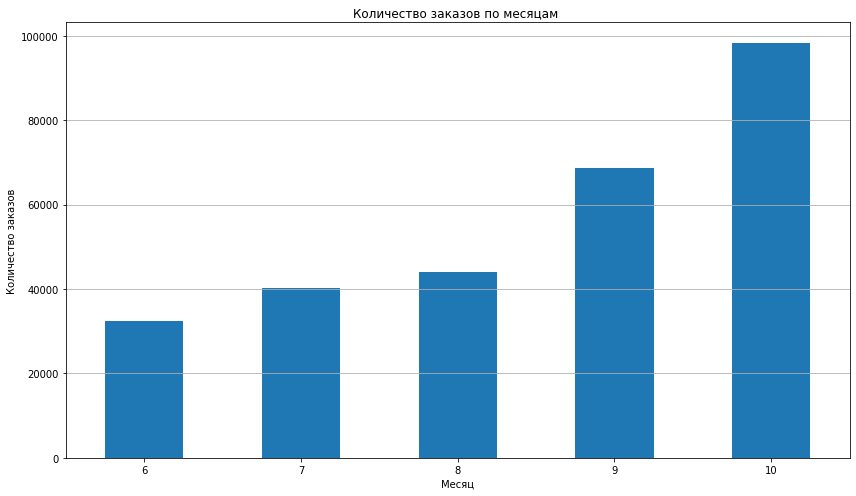

In [67]:
# Построим столбчатый график с количеством заказов для каждого месяца
merged_df['month'].value_counts().sort_values(ascending = True).plot(
    kind='bar',
    rot = 0,
    legend = False,
    title = 'Количество заказов по месяцам ',
    figsize = (12,7)
    )
plt.ylabel('Количество заказов')
plt.xlabel('Месяц')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Можно увидеть ежемесячный рост количества заказов с июня по октябрь, а также то, что количество заказов за неполный осенний сезон превышает количество заказов за полный летний сезон

 - Изучим распределние заказов за летний и осенний период по категориям

Посмотрим на распределение заказов по сезонам по типу устройства

In [68]:
# Посмотрим на распределение заказов по типу устройства
a = merged_df[(merged_df['season']=='лето')].groupby(['season','device_type_canonical'])['order_id'].count()
b = merged_df[(merged_df['season']=='лето')].groupby(['season','device_type_canonical'])['order_id'].count().sum()
device_type_share_summer = a/b
device_type_share_summer.unstack()
c = merged_df[(merged_df['season']=='осень')].groupby(['season','device_type_canonical'])['order_id'].count()
d = merged_df[(merged_df['season']=='осень')].groupby(['season','device_type_canonical'])['order_id'].count().sum()
device_type_share_autumn = c/d
device_type_share_autumn.unstack()

device_type_canonical,desktop,mobile
season,,
осень,0.202808,0.797192


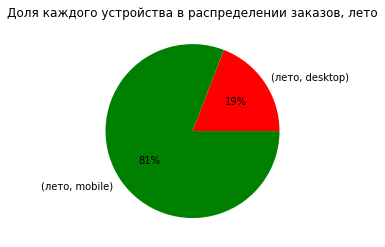

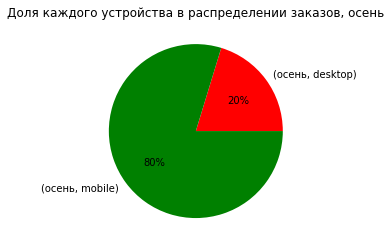

In [69]:
# Построим график распредение заказов в осенний и летний период
device_type_share_summer.plot(
    kind='pie' ,
    title='Доля каждого устройства в распределении заказов, лето',
    autopct='%.0f%%',
    ylabel= '',
    colors=['red','green']
)

plt.show()

device_type_share_autumn.plot(
    kind='pie' ,
    title='Доля каждого устройства в распределении заказов, осень',
    autopct='%.0f%%',
    ylabel= '',
    colors=['red','green']
)

plt.show()

Посмотрим на распределние заказов за летний и осенний период по типу мероприятия

In [70]:
# Сформируем таблицу с данными о заказах по типу мероприятия за оба сезона
summer_autumn = merged_df.groupby('event_type_main')['season'].value_counts().unstack(fill_value=0)
summer_autumn

season,лето,осень
event_type_main,,
выставки,2401,2424
другое,31858,32606
концерты,48884,62653
спорт,2927,18382
стендап,6250,6808
театр,23820,42348
ёлки,270,1644


In [71]:
# Расчитаем долю каждого мероприятия за лето
summer_autumn['summer_event_share'] = summer_autumn['лето']/summer_autumn['лето'].sum()
# Расчитаем долю каждого мероприятия за осень
summer_autumn['autumn_event_share'] = summer_autumn['осень']/summer_autumn['осень'].sum()
summer_autumn

season,лето,осень,summer_event_share,autumn_event_share
event_type_main,,,,
выставки,2401,2424,0.020625,0.014527
другое,31858,32606,0.273671,0.195403
концерты,48884,62653,0.419930,0.375471
спорт,2927,18382,0.025144,0.110161
стендап,6250,6808,0.053690,0.040799
театр,23820,42348,0.204622,0.253786
ёлки,270,1644,0.002319,0.009852


In [72]:
# Отберём нужные столбцы и переименуем их
summer_autumn = summer_autumn.loc[:,['summer_event_share','autumn_event_share']]
summer_autumn.columns = ['лето','осень']

In [73]:
# Посмотрим на результат
summer_autumn

,лето,осень
event_type_main,,
выставки,0.020625,0.014527
другое,0.273671,0.195403
концерты,0.419930,0.375471
спорт,0.025144,0.110161
стендап,0.053690,0.040799
театр,0.204622,0.253786
ёлки,0.002319,0.009852


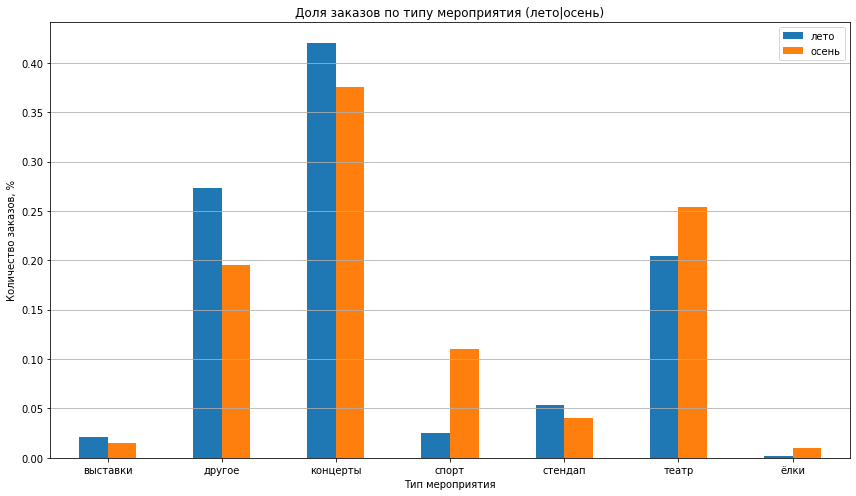

In [74]:
# Построим столбчатую диграмму доли каждого мероприятия за каждый сезон
summer_autumn.plot(
    kind='bar',
    rot = 0,
    legend = True,
    title = 'Доля заказов по типу мероприятия (лето|осень)',
    figsize = (12,7)
    )
plt.ylabel('Количество заказов, %')
plt.xlabel('Тип мероприятия')
plt.tight_layout()
plt.grid(axis='y')
plt.show()
plt.show()

In [75]:
# Посчитаем количество заказов в абсолютном значении для каждого типа мероприятия за каждый сезон
grp = merged_df.groupby(['season','event_type_main'])['order_id'].count().unstack()
grp

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки
season,,,,,,,
лето,2401,31858,48884,2927,6250,23820,270
осень,2424,32606,62653,18382,6808,42348,1644


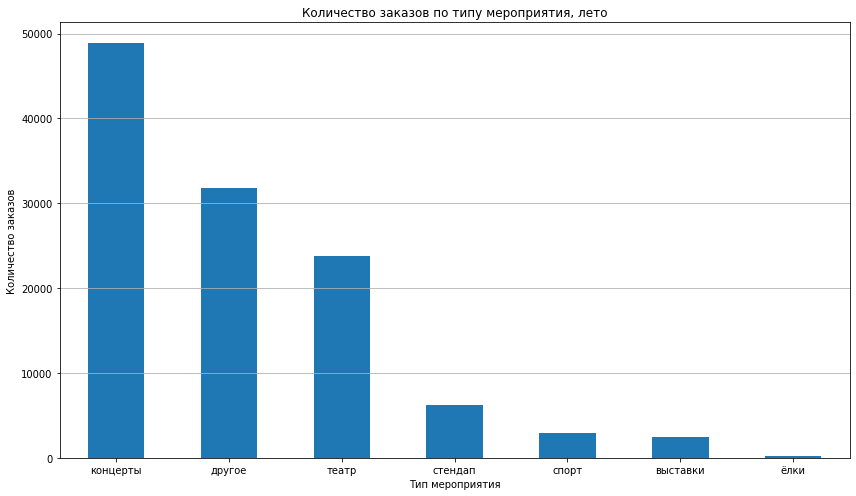

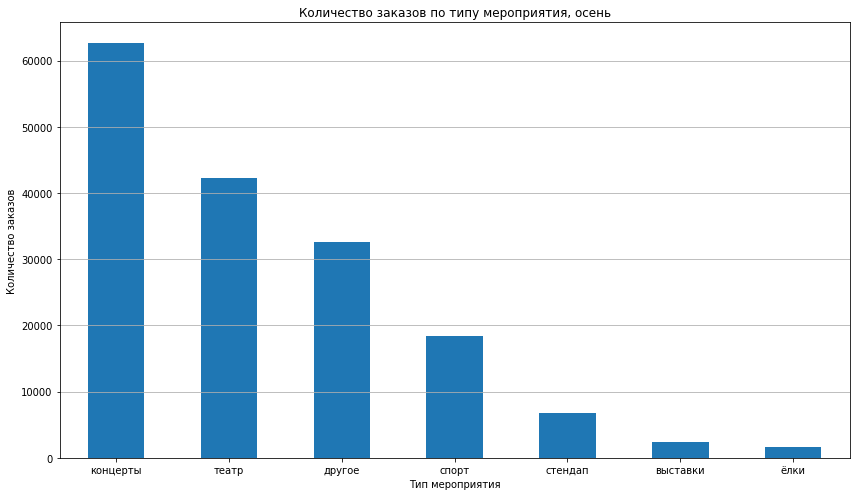

In [76]:
# Построим столбчатую диаграмму на основе сгруппированных данных 
for season in grp.index.unique().to_list():
    grp.loc[(season,grp.columns.unique().to_list())].sort_values(ascending = False).plot(
    kind='bar',
    rot = 0,
    legend = False,
    title = f'Количество заказов по типу мероприятия, {season}',
    figsize = (12,7)
    )
    plt.ylabel('Количество заказов')
    plt.xlabel('Тип мероприятия')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


In [77]:
# Посчитаем долю каждого возрастного ограничения за осень
a = merged_df[(merged_df['season']=='лето')].groupby(
    ['season','age_limit'])['order_id'].count()
b = merged_df[(merged_df['season']=='лето')].groupby(
    ['season','age_limit'])['order_id'].count().sum()
age_limit_share_summer = round(a/b,3)
age_limit_share_summer.unstack()

age_limit,0,6,12,16,18
season,,,,,
лето,0.181,0.186,0.199,0.283,0.152


In [78]:
# Посчитаем долю каждого возрастного ограничения за осень
c = merged_df[(merged_df['season']=='осень')].groupby(
    ['season','age_limit'])['order_id'].count()
d = merged_df[(merged_df['season']=='осень')].groupby(
    ['season','age_limit'])['order_id'].count().sum()
age_limit_share_autumn = round(c/d,3)
age_limit_share_autumn.unstack()

age_limit,0,6,12,16,18
season,,,,,
осень,0.233,0.178,0.221,0.264,0.104


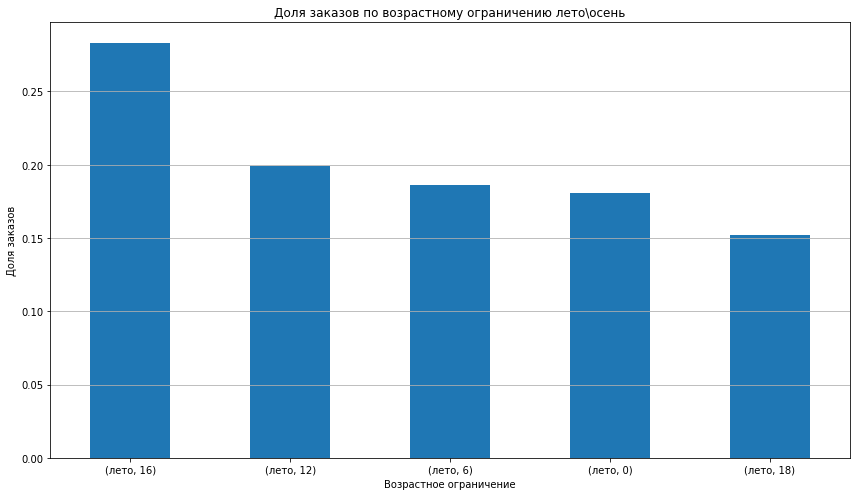

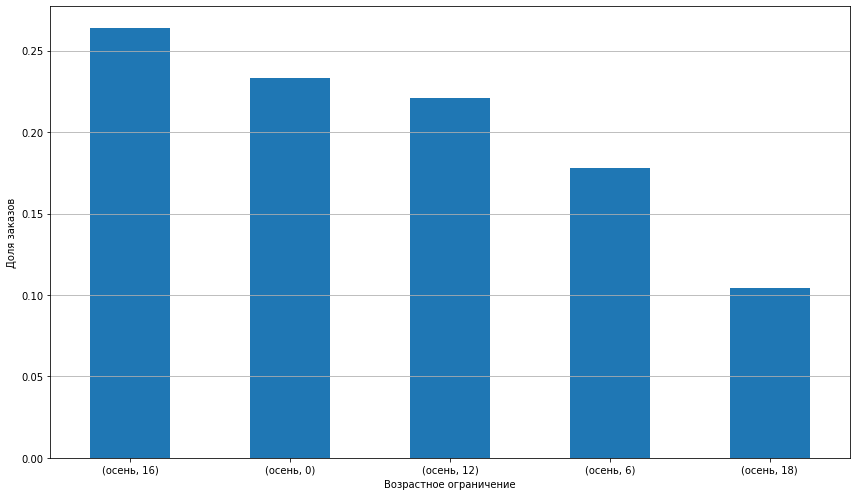

In [79]:
# Посмтроим столбчатую диаграмму для каждого сезона по доле заказов по возростному ограничению
plt.title('Доля заказов по возрастному ограничению лето\осень')
for i in (age_limit_share_summer,age_limit_share_autumn):
    i.sort_values(ascending = False).plot(
    kind='bar',
    rot = 0,
    legend = False,
    figsize = (12,7)
    )
    plt.ylabel('Доля заказов')
    plt.xlabel('Возрастное ограничение')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

 - Изменение выручки с продажи одного билета для разных типов мероприятий 

In [80]:
# Посчитаем количество заказов в абсолютном значении для каждого типа мероприятия за каждый сезон
grp1 = merged_df.groupby(['season','event_type_main']).agg(
    total_revenue = ('revenue_rub','sum'),
    total_tickets = ('tickets_count','sum'))
grp1['avg_rev_per_ticket'] = grp1['total_revenue']/grp1['total_tickets']
grp1

total_revenue  total_tickets  avg_rev_per_ticket
season event_type_main                                                  
лето   выставки          5.436451e+05         6082.0           89.385913
       другое            7.541052e+06        86533.0           87.146551
       концерты          3.794840e+07       127734.0          297.089264
       спорт             4.338976e+05         8252.0           52.580897
       стендап           4.063968e+06        18438.0          220.412653
       театр             1.417209e+07        65081.0          217.760760
       ёлки              2.217266e+05          814.0          272.391431
осень  выставки          5.729628e+05         6157.0           93.058764
       другое            7.188497e+06        87131.0           82.502175
       концерты          4.535990e+07       163271.0          277.819699
       спорт             2.749068e+06        54939.0           50.038556
       стендап           4.579136e+06        19796.0          231.316200
       театр             2.074549e+07       114182.0          181.687902
       ёлки              1.226024e+06         5386.0          227.631638

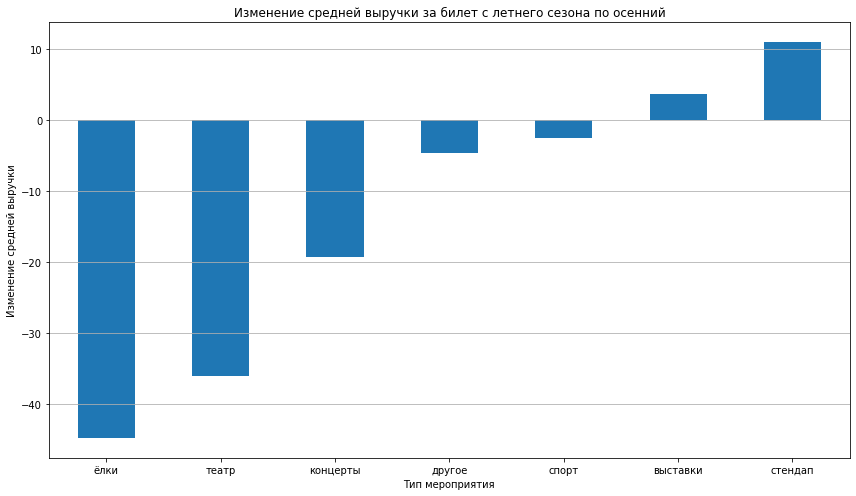

In [81]:
# Построим столбчатую диаграмму для отображения изменения средней выручки за билет с лета по осень
avg_diff = grp1.loc['осень',['avg_rev_per_ticket']] - grp1.loc['лето',['avg_rev_per_ticket']]
avg_diff.sort_values(by = 'avg_rev_per_ticket').plot(
    kind='bar',
    rot = 0,
    legend = False,
    figsize = (12,7)
    )
plt.title('Изменение средней выручки за билет с летнего сезона по осенний')
plt.ylabel('Изменение средней выручки')
plt.xlabel('Тип мероприятия')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

___
#### Промежуточный вывод

По результатам анализа распеределения заказов по сегментам можно сделать следующий вывод:
- Можно увидеть, что количество заказов, сделанных за неполный осений период (2 месяца) превышает количество заказов, сделанных за полный летний период.
- В каждом сезоне 80% заказов было оформлено через мобильный телефон. Остальные 20% - станционарный компьютер.
- В каждом сезоне события типа "концерт" были самыми популярными. Летом доля "концертов" состовляла 42% от всех заказов за лето. Осенью доля снизилась до 37,5% от всех заказов осенью. Самым непопулярным за оба сезона были события типа "елки"
- События с возростным ограничением 16+ были популярнее всего за оба сезона. Летом их доля состовляла 28,3%, осенью - 26,4 %. События "0+" сильно выросли в популярности с лета по осень - с 18% до 23%. Самым непопулярным оказались события с возростным ограничением "18+"
- В период с лета по осень средний выручка с продажи одного билета на различные мероприятия в основном сократился. Средняя выручка сильно __уменьшилась__ у "ёлки" - больше, чем на 40 рублей. У мероприятий типа "театр" выручка упала больше, чем на 30 рублей. У "концертов" средняя выручка уменьшилась почти на 20 рублей.У "спорта" и других типов мероприятий средняя выручка уменьшилась меньше, чем на 10 рублей. При этом у "выставок" и "стендапов" средняя выручка с билета __увеличилась__. У "выставок" до 10 рублей, у "стендапов"  - больше, чем на 10 рублей. 

___

<a id='7'></a>
### Осенняя активность пользователей

- Создадим сводную таблицу

In [82]:
# Отфильтруем данные, чтобы остались только информация за осенний сезон
autumn_merged_df = merged_df[merged_df['created_dt_msk'].dt.month.isin([9,10])]

In [83]:
# Созадим сводную таблицу по отфильтрованным данным
pivot = autumn_merged_df.pivot_table(index = autumn_merged_df['created_dt_msk'],
                             values = ['order_id','user_id','revenue_rub','tickets_count'],
                             aggfunc = {
                                 'order_id':'count',
                                 'user_id':'nunique',
                                 'revenue_rub':'sum',
                                 'tickets_count':'sum'
                             })
pivot['avg_order_per_user'] = round(pivot['order_id']/pivot['user_id'],2)
pivot['avg_rev_per_ticket'] = pivot['revenue_rub']/pivot['tickets_count']
pivot = pivot.loc[:,['order_id','user_id','avg_order_per_user','avg_rev_per_ticket']]
pivot.columns = ['total_orders','DAU','avg_order_per_user','avg_rev_per_ticket']
pivot

,total_orders,DAU,avg_order_per_user,avg_rev_per_ticket
created_dt_msk,,,,
2024-09-01,1313,562,2.34,202.421498
2024-09-02,1368,570,2.40,194.813584
2024-09-03,4992,770,6.48,77.608160
2024-09-04,1750,679,2.58,181.416600
2024-09-05,1921,733,2.62,194.439748
...,...,...,...,...
2024-10-27,2832,1027,2.76,190.487395
2024-10-28,2810,977,2.88,176.892479
2024-10-29,2844,997,2.85,184.847787


In [84]:
# Сбросим индексы и создадим дополнительные категоризирующие столбцы дней недели
pivot = pivot.reset_index()
pivot['day_of_week_number'] = pivot['created_dt_msk'].dt.day_of_week+1
pivot['day_of_week'] = pivot['created_dt_msk'].dt.strftime('%A')

In [85]:
# Напишем функцию для построения линейного графика
def build_line_plot(x,y,title,label,xlabel,ylabel):
    x = x
    y = y

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, label = label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

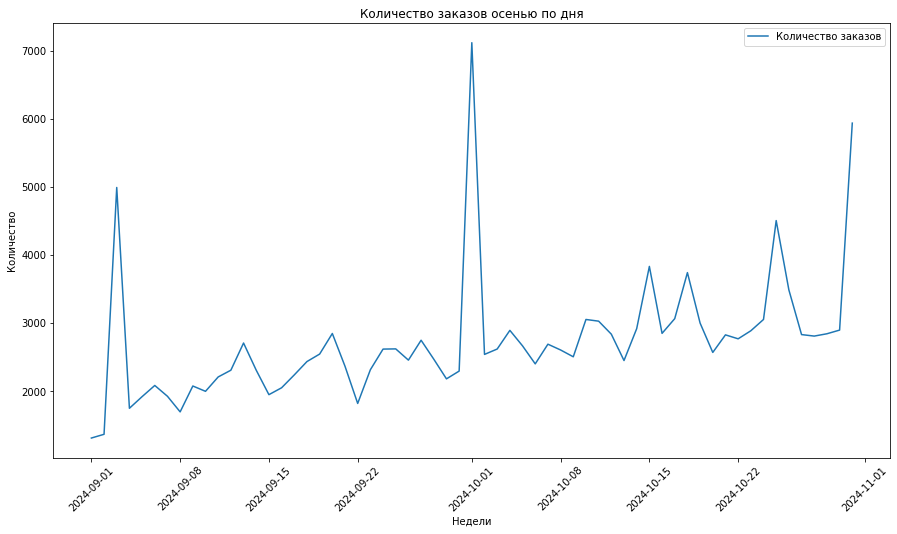

In [86]:
# Построим график количества заказов по дням
build_line_plot(pivot['created_dt_msk'],pivot['total_orders'],'Количество заказов осенью по дня', 'Количество заказов',
               "Недели","Количество")

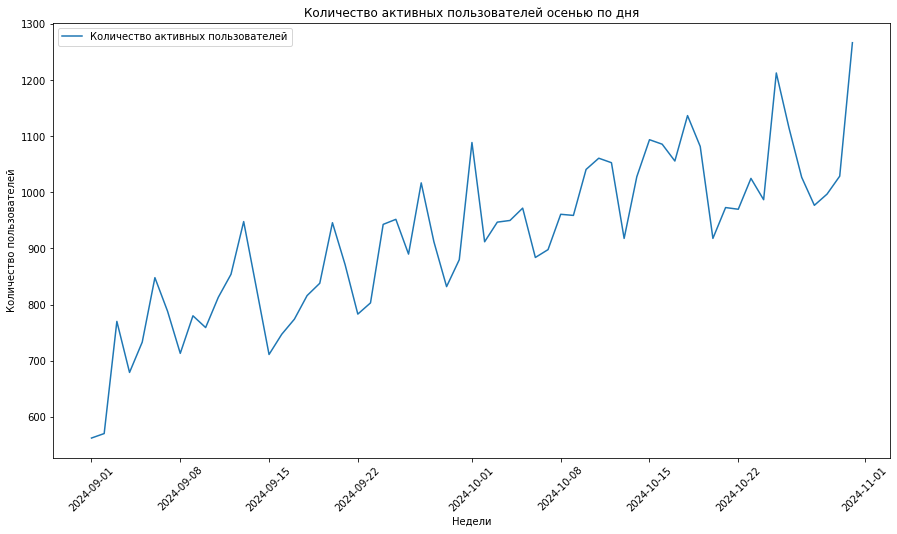

In [87]:
# Построим график активных пользователей по дням
build_line_plot(pivot['created_dt_msk'],pivot['DAU'],'Количество активных пользователей осенью по дня', 
                'Количество активных пользователей',
               "Недели","Количество пользователей")

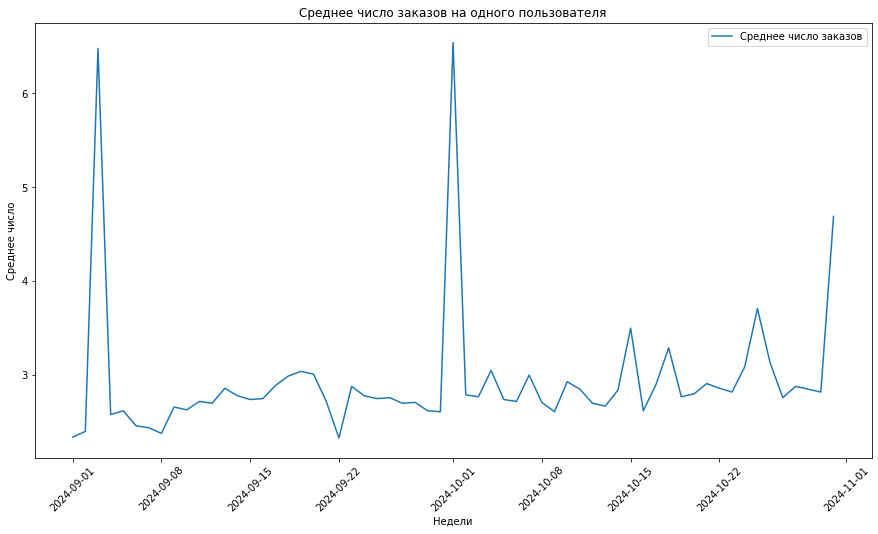

In [88]:
# Построим график среднего числа заказов на пользователя
build_line_plot(pivot['created_dt_msk'],pivot['avg_order_per_user'],'Среднее число заказов на одного пользователя', 
                'Среднее число заказов',
               "Недели","Среднее число")

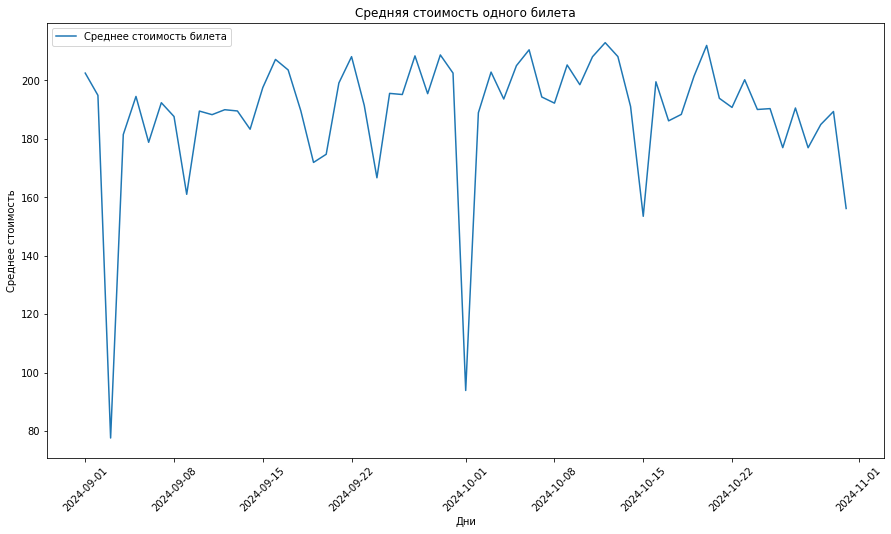

In [89]:
# Построим график средней стоимости одного билета
build_line_plot(pivot['created_dt_msk'],pivot['avg_rev_per_ticket'],'Средняя стоимость одного билета', 
                'Среднее стоимость билета',
               "Дни","Среднее стоимость")

In [90]:
# Посмотрим на сводную таблицу
pivot

,created_dt_msk,total_orders,DAU,avg_order_per_user,avg_rev_per_ticket,day_of_week_number,day_of_week
0,2024-09-01,1313,562,2.34,202.421498,7,Sunday
1,2024-09-02,1368,570,2.40,194.813584,1,Monday
2,2024-09-03,4992,770,6.48,77.608160,2,Tuesday
3,2024-09-04,1750,679,2.58,181.416600,3,Wednesday
4,2024-09-05,1921,733,2.62,194.439748,4,Thursday
...,...,...,...,...,...,...,...
56,2024-10-27,2832,1027,2.76,190.487395,7,Sunday
57,2024-10-28,2810,977,2.88,176.892479,1,Monday
58,2024-10-29,2844,997,2.85,184.847787,2,Tuesday
59,2024-10-30,2898,1029,2.82,189.287160,3,Wednesday


In [91]:
# Сгруппируем данные по названию дня недели и номеру дня недели и подсчитаем количество заказов
pivot.groupby(['day_of_week','day_of_week_number'])['total_orders'].sum().sort_index()

day_of_week  day_of_week_number
Friday       5                     24561
Monday       1                     21356
Saturday     6                     21066
Sunday       7                     19218
Thursday     4                     26964
Tuesday      2                     31021
Wednesday    3                     22701
Name: total_orders, dtype: int64

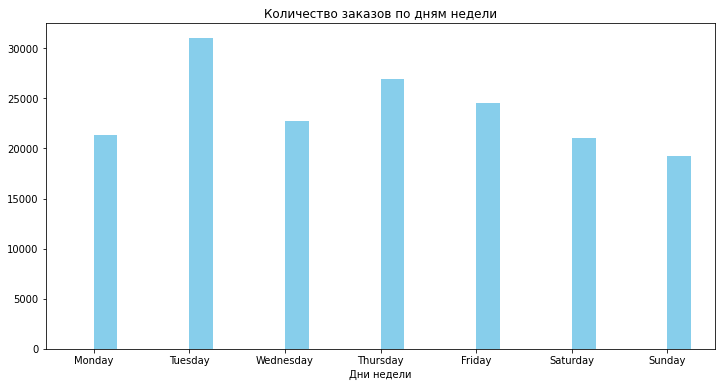

In [92]:
# Построим график среднего числа заказов на пользователя
pivot.groupby(['day_of_week','day_of_week_number'])['total_orders'].sum().reset_index().sort_values(by='day_of_week_number').plot(
kind='bar',
title = 'Количество заказов по дням недели',
x = 'day_of_week',
xlabel = 'Дни недели',
legend = False,
rot = 0,
color = 'skyblue',
figsize =(12,6))


plt.show()

___
#### Промежуточный вывод

По результатам осенней активности пользователей можно сделать следующие выводы:
- Наибольшие значения количества заказов приходились на начало каждого месяца. Также можно отметить небольшой рост заказов с сентября по начало ноября.
- Наблюдается скачкообразный плавный рост количества пользователей в течении всего осеннего сезона.
- Среднее число заказов на одного пользователя также имеет наибольшие значения в начале каждого месяца.
- В начале сентября и октября средняя стоимость билета имеет наименьшее значение.
- За осенний сезон люди больше всего заказывали во вторник. Четверг и пятница также выделяются высоким количеством заказов за весь период. Начиная с четверга можно наблюдать снижение количества заказов до понедельника, после которого следует "бум" заказов с дальнейшим снижением метрики.
- Вероятнее всего, что большое количество заказов в начале месяца напрямую связано с наименьшими показателями средней стоимости билетов в эти же периоды.
___

<a id='8'></a>
### Популярные события и партнёры

- Построим сводную таблицу регионов

In [93]:
# Создадим сводную таблицу для регионов
regions = autumn_merged_df.pivot_table(index = autumn_merged_df['region_name'],
                                      values = ['event_id','order_id'],
                                      aggfunc = {
                                          'event_id':'nunique',
                                          'order_id':'count'
                                      }).sort_values(by='order_id',ascending=False).reset_index()
regions

,region_name,event_id,order_id
0,Каменевский регион,3914,46456
1,Североярская область,2602,20463
2,Медовская область,369,11769
3,Широковская область,799,8607
4,Озернинский край,293,7470
...,...,...,...
74,Островогорский округ,4,18
75,Яснопольский округ,5,18
76,Крутоводский регион,5,14
77,Верхозёрский край,2,11


In [94]:
# Переименуем столбцы
regions.columns = ['region_name','total_events','total_orders']

In [95]:
# Вычислим долю каждого региона по количеству мероприятий
regions['region_events_share'] = regions['total_events']/regions['total_events'].sum()

In [96]:
# Вычислим долю каждого региона по заказам
regions['region_orders_share'] = regions['total_orders']/regions['total_orders'].sum()

In [97]:
# Отсортируем таблицу по количеству проведённых мероприятий
regions.sort_values(by='total_events',ascending=False).head(20)

,region_name,total_events,total_orders,region_events_share,region_orders_share
0,Каменевский регион,3914,46456,0.247361,0.278405
1,Североярская область,2602,20463,0.164444,0.122632
3,Широковская область,799,8607,0.050496,0.051581
5,Светополянский округ,761,4764,0.048095,0.028550
10,Речиновская область,527,3520,0.033306,0.021095
7,Серебринская область,453,4395,0.028629,0.026339
8,Яблоневская область,430,4146,0.027176,0.024846
14,Тепляковская область,419,2425,0.026480,0.014533
11,Горицветская область,403,3192,0.025469,0.019129
9,Солнечноземская область,401,4143,0.025343,0.024828


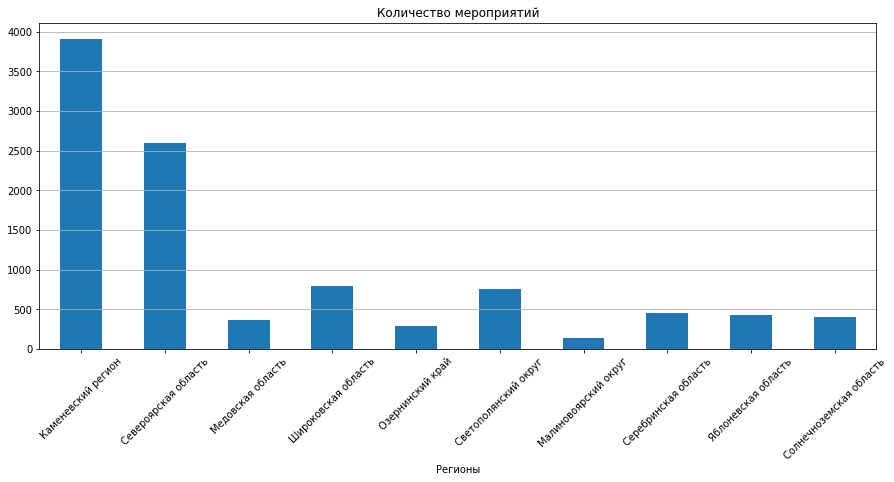

In [98]:
# Построим столбчатую диаграмму по количеству мероприятий в топ-10 регоинах
regions.head(10).plot(
kind='bar',
title = 'Количество мероприятий',
x = 'region_name',
y = 'total_events',
xlabel = 'Регионы',
legend = False,
rot = 45,
figsize =(15,6))

plt.grid(axis='y')
plt.show()

In [99]:
# Создадим сводную таблицу сервисов-партнеров и расчитаем интересующие метрики
pd.set_option('display.float_format', '{:,.2f}'.format)
partners = autumn_merged_df.pivot_table(index = autumn_merged_df['service_name'],
                                      values = ['event_id','order_id','revenue_rub'],
                                      aggfunc = ({
                                          'event_id':'nunique',
                                          'order_id':'count',
                                          'revenue_rub':'sum'
                                      })).sort_values(by='order_id',ascending=False).reset_index()
# Переименуем столбцы
partners.columns = ['service_name','total_events','total_orders','total_revenue']
# Вычислим долю каждого сервиса-партенра по метрикам
partners['event_share'] = partners['total_events']/partners['total_events'].sum()
partners['orders_share'] = partners['total_orders']/partners['total_orders'].sum()
partners['revenue_share'] = partners['total_revenue']/partners['total_revenue'].sum()

In [100]:
# Посмотрим на полученную таблицу
partners

,service_name,total_events,total_orders,total_revenue,event_share,orders_share,revenue_share
0,Билеты без проблем,2836,31944,"12,358,407.00",0.16,0.19,0.15
1,Лови билет!,3604,25447,"10,237,237.00",0.21,0.15,0.12
2,Билеты в руки,2461,25280,"7,426,316.00",0.14,0.15,0.09
3,Мой билет,1003,19290,"11,064,344.00",0.06,0.12,0.13
4,Облачко,1404,15423,"10,664,723.00",0.08,0.09,0.13
5,Лучшие билеты,1391,12308,"1,679,813.88",0.08,0.07,0.02
6,Весь в билетах,603,9412,"9,473,095.00",0.03,0.06,0.11
7,Прачечная,727,5712,"2,559,150.25",0.04,0.03,0.03
8,Тебе билет!,852,3716,"2,157,877.25",0.05,0.02,0.03
9,Яблоко,535,3441,"2,749,635.75",0.03,0.02,0.03


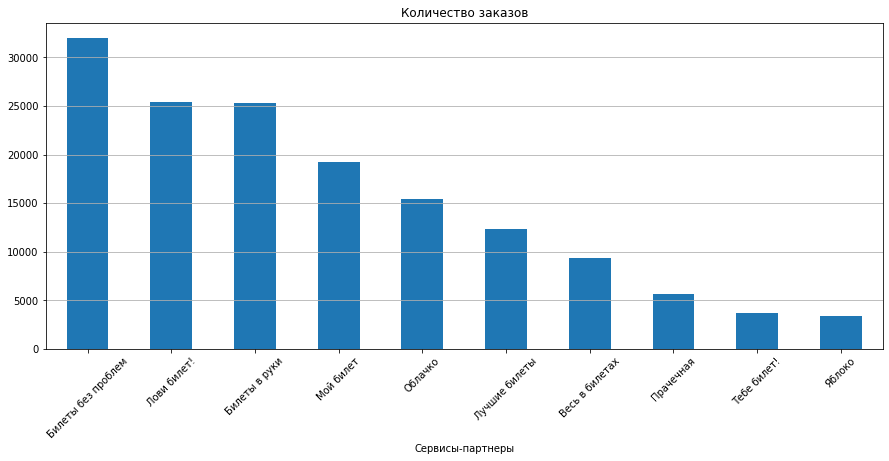

In [101]:
# Построим столбчатую диаграмму по количеству заказов в топ-10 сервисах-партнеров
partners.head(10).plot(
kind='bar',
title = 'Количество заказов',
x = 'service_name',
y = 'total_orders',
xlabel = 'Сервисы-партнеры',
legend = False,
rot = 45,
figsize =(15,6))

plt.grid(axis='y')
plt.show()


___
#### Промежуточный вывод

В результате анализа популярных событий и партнеров можно сделать следующие выводы:
- Каменевский регион и Североярская область - топ-1 (25% от всех мероприятий в регионах) и топ-2 (16% от всех мероприятий в регионах) , соответственно, по количеству мероприятий с большим отрывом от других регионов. В Широковской области — топ-3 (5% от всех мероприятий в регионах) — в три раза меньше мероприятий, чем в Североярской, и в пять раз меньше, чем в Каменевском регионе.
- У сервисов по продаже билетов другая картина. Сильного разрыва, как у регионов, нет. Есть три уверенных лидера по количеству обработанных заказов: "Билеты без проблем" - топ-1 с долей в 19% от всех заказов; "Лови билет!" с долей в 15%; "Билеты в руки" с долей 15%
___

<a id='4'></a>
## Статистический анализ данных

Проверим две гипотезы:
1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

- Проверим независимость выборок

In [102]:
# Выведим общее число уникальных пользователей в осенний сезон
autumn_merged_df['user_id'].nunique()

15712

In [103]:
#Проверяем пересечение пользователей в группах
mobile_group = autumn_merged_df[autumn_merged_df['device_type_canonical']=='mobile']['user_id']
desktop_group = autumn_merged_df[autumn_merged_df['device_type_canonical']=='desktop']['user_id']
#Создаем список пересекающихся пользователей
intersection = list(set(mobile_group) & set(desktop_group))
print(len(intersection)) 

3225


In [104]:
# Уберем пересекающихся пользователей
autumn_test = autumn_merged_df[~autumn_merged_df['user_id'].isin(intersection)]
# Проверим количество уникальных пользователей
autumn_test['user_id'].nunique()

12487

In [105]:
# Посмотрим на распределение пользователей по типу устройств
test_grp = autumn_test.groupby('device_type_canonical')['user_id'].nunique()
test_grp

device_type_canonical
desktop     1610
mobile     10877
Name: user_id, dtype: int64

In [106]:
# Расчитываем процентную разницу
P = 100 * abs(test_grp['mobile'] - test_grp['desktop'])/test_grp['mobile']
print(f'Процентная разница состовляет {round(P,2)}%')

Процентная разница состовляет 85.2%


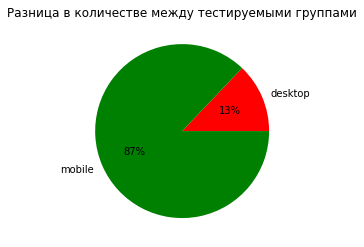

In [107]:
# Строим круговую диаграмму для визуализации соотношений количества пользователей между группами
test_grp.plot(
    kind='pie' ,
    title='Разница в количестве между тестируемыми группами',
    autopct='%.0f%%',
    ylabel= '',
    colors=['red','green']
)

plt.show()

Процентная разница между группами типа устройства состовляет 85%. Однако нас интересует временной промежуток, а точнее активность пользователей в осенний сезон. Поэтому значительная разница в количестве пользователей между группами не столь значима.

In [108]:
# Составим сводную таблицу данных пользователей мобильного устройства
autumn_pivot_mobile = autumn_test[autumn_test['device_type_canonical']=='mobile'].pivot_table(index = autumn_test['created_dt_msk'],
                             values = ['order_id','user_id','days_since_prev'],
                             aggfunc = {
                                 'order_id':'count',
                                 'user_id':'nunique',
                                 'days_since_prev':'sum'
                             }).reset_index()
autumn_pivot_mobile['avg_order_per_user'] = round(autumn_pivot_mobile['order_id']/autumn_pivot_mobile['user_id'],2)
autumn_pivot_mobile.columns = ['created_dt_msk','days_since_prev','total_orders','DAU','avg_order_per_user']
autumn_pivot_mobile['avg_days_since_prev'] = round(autumn_pivot_mobile['days_since_prev']/autumn_pivot_mobile['DAU'],2)
autumn_pivot_mobile

,created_dt_msk,days_since_prev,total_orders,DAU,avg_order_per_user,avg_days_since_prev
0,2024-09-01,"2,512.00",268,174,1.54,14.44
1,2024-09-02,"2,560.00",248,168,1.48,15.24
2,2024-09-03,"3,435.00",576,240,2.40,14.31
3,2024-09-04,"3,305.00",315,210,1.50,15.74
4,2024-09-05,"3,152.00",338,233,1.45,13.53
...,...,...,...,...,...,...
56,2024-10-27,"7,594.00",564,391,1.44,19.42
57,2024-10-28,"5,968.00",579,350,1.65,17.05
58,2024-10-29,"6,779.00",590,349,1.69,19.42
59,2024-10-30,"6,394.00",595,365,1.63,17.52


In [109]:
# Составим сводную таблицу данных пользователей станционарного компьютера
autumn_pivot_desktop = autumn_test[autumn_test['device_type_canonical']=='desktop'].pivot_table(index = autumn_test['created_dt_msk'],
                             values = ['order_id','user_id','days_since_prev'],
                             aggfunc = {
                                 'order_id':'count',
                                 'user_id':'nunique',
                                 'days_since_prev':'sum'
                             }).reset_index()
autumn_pivot_desktop['avg_order_per_user'] = round(autumn_pivot_desktop['order_id']/autumn_pivot_desktop['user_id'],2)
autumn_pivot_desktop.columns = ['created_dt_msk','days_since_prev','total_orders','DAU','avg_order_per_user']
autumn_pivot_desktop['avg_days_since_prev'] = round(autumn_pivot_desktop['days_since_prev']/autumn_pivot_desktop['DAU'],2)
autumn_pivot_desktop

,created_dt_msk,days_since_prev,total_orders,DAU,avg_order_per_user,avg_days_since_prev
0,2024-09-01,111.00,24,14,1.71,7.93
1,2024-09-02,303.00,37,22,1.68,13.77
2,2024-09-03,392.00,120,38,3.16,10.32
3,2024-09-04,622.00,47,29,1.62,21.45
4,2024-09-05,301.00,31,25,1.24,12.04
...,...,...,...,...,...,...
56,2024-10-27,"1,155.00",38,31,1.23,37.26
57,2024-10-28,968.00,57,39,1.46,24.82
58,2024-10-29,975.00,64,40,1.60,24.38
59,2024-10-30,"1,074.00",71,43,1.65,24.98


In [110]:
# Посмотрим на центральные метрики среднего количества заказов пользователей мобильного устройства 
autumn_pivot_mobile.avg_order_per_user.describe()

count   61.00
mean     1.60
std      0.19
min      1.37
25%      1.49
50%      1.56
75%      1.64
max      2.50
Name: avg_order_per_user, dtype: float64

In [111]:
# Посмотрим на центральные метрики среднего количества заказов пользователей станционарного компьютера
autumn_pivot_desktop.avg_order_per_user.describe()

count   61.00
mean     1.60
std      0.57
min      1.07
25%      1.34
50%      1.51
75%      1.62
max      5.07
Name: avg_order_per_user, dtype: float64

__Первая гипотеза__ будет выглядеть так:
- Нулевая гипотеза: среднее количество заказов на одного пользователя мобильного приложения не отличается от пользователей стационарных устройств
- Алтернативная гипотеза: среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

Т.к. нас интересуют средние значения,то разница в количестве пользователей не столь критична. Главное, чтобы были значения каждой интересующей метрики на каждый день осеннего сезона. После построения сводной таблицы эти метрики были получены для каждого дня осеннего сезона. Поэтому можно использовать Т-тест Стьюдента для проверки гипотез  

In [112]:
# Определяем группы для тестирования
group_a = autumn_pivot_mobile.avg_order_per_user
group_b = autumn_pivot_desktop.avg_order_per_user

test_result = ttest_ind(
    group_a,
    group_b,
    alternative='greater' 
)

# Фиксируем уровень значимости
alpha = 0.05

if test_result.pvalue > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Отличий в показателе среднего количества заказов на пользователя либо слишком мало, либо нет совсем')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Присутствуют отличия в данных между тестируемыми группами') 

pvalue=0.5366488083756731 > 0.05
Отличий в показателе среднего количества заказов на пользователя либо слишком мало, либо нет совсем


In [113]:
# Посмотрим на центральные метрики среднего количества дней междду заказами пользователей мобильного устройства
autumn_pivot_mobile.avg_days_since_prev.describe()

count   61.00
mean    17.18
std      2.26
min     11.95
25%     15.84
50%     16.92
75%     18.52
max     22.59
Name: avg_days_since_prev, dtype: float64

In [114]:
# Посмотрим на центральные метрики среднего количества дней междду заказами пользователей станционарного компьютера
autumn_pivot_desktop.avg_days_since_prev.describe()

count   61.00
mean    18.63
std      6.34
min      4.94
25%     14.27
50%     17.57
75%     24.16
max     37.26
Name: avg_days_since_prev, dtype: float64

__Вторая гипотеза__ будет выглядеть так:
- Нулевая гипотеза: среднее время между заказами пользователей мобильных приложений не  отличается от пользователей стационарных устройств.
- Алтернативная гипотеза: среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [115]:
# Определяем группы для тестирования
group_a = autumn_pivot_mobile.avg_days_since_prev
group_b = autumn_pivot_desktop.avg_days_since_prev

stat_welsh_ttest, p_value_welsh_ttest = ttest_ind(
    group_a,
    group_b,
    equal_var = False,
    alternative='greater'
)

# Фиксируем уровень значимости
alpha = 0.05

if p_value_welsh_ttest > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Отличий в показателе среднего времени между заказами пользователей либо слишком мало, либо нет совсем')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Присутствуют отличия в данных между тестируемыми группами') 

pvalue=0.5366488083756731 > 0.05
Отличий в показателе среднего времени между заказами пользователей либо слишком мало, либо нет совсем


___
#### Промежуточный вывод

По результатам осенней активности пользователей можно сделать следующие выводы:
- Было найдено 3225 пересекающихся пользователей между группами станционарных и мобильных устройств.
- Процентная разница между группами типа устройства состовляет 85%
- После составления сводных таблиц было решено использовать Т-тест Стьюдента, для подтверждений гипотез
- Гипотеза о том, что среднее количество заказов на пользователя мобильного устройства больше, чем у пользователя станционарного __не подтвердилась__. Средние метрики обеих групп имеют незначительные отличия, которых не достаточно, чтобы утверждать преимущество одной группы над другой.
- Гипотеза о том, что среднее количество дней между заказами пользователей мобильных устройств выше, чем у пользователей станционарных также __не подтвердилась__. 
- Можно отметить, что максимальные значения в группах отличались. Так, макисимальное значение среднего количества заказов на пользователя станционарного устройства составляет 5 у.е. У пользователей мобильного устройства это значение составляет 2.5 у.е
-  Тоже самое относится и к среднему количеству дней между заказами: значение у пользователей станц.устройств - 37 дней; у пользователей мобил.устройств - 22,5 дня.
- Также стоит отметить, что исследуемые метрики в средних и медианных значениях в обеих группах сильно схожи: по среднему количеству заказов, среднее значение у пользователей станц. и мобил. устройств равны - 1.6 у.е; по количеству дней между заказами - у пользователей станц. устройств состовляет 18 дней против 17 дней у пользователей мобил.устроств. По медианному значению: среднее количество заказов 1.51 у станц.устроств против 1.56 у мобил.устроств: среднее количество дней 17.5  дней у станц.устройств против 17 дней у мобил. устройств.
___

<a id='5'></a>
## Общий вывод и рекомендации

Работа проводилась над данными над данными Яндекс Афиши за летний и осенний период 2024 года. Целью проекта являлось исследование пользовательских предпочтений и их изменение. Данные содержали в себе информацию о заказах, информацию о событиях (мероприятиях) и данные по курсу тенге к рублю. После проведения исследования сделаны следующие выводы:
- За неполный осенний период общее количество заказов превышало тот же показатель за летний период. Вероятнее всего, сказывается сезонность, а именно наступление предновогоднего периода.
- Больше всего пользовались популярностью за оба сезона концерты и театры. Мероприятия, имеющие возрастное ограничение «16+», имели наибольшую популярность в обоих сезонах. Также можно отметить рост популярности мероприятий с ограничением «0+» в осенний сезон.
- При этом средняя выручка с одного у концертов и театров в осенний период уменьшилась. Повышение данного показателя наблюдается у таких мероприятий, как «стендап» и «выставки». «Стендап» также хорошо себя показывает по увеличению доли мероприятий с лета по осень.
- Осенний период характеризуется повышенным спросом на билеты в начале каждого месяца. Во вторник, четверг и пятницу пользователи делали больше всего заказов.
- Каменевский регион и Североярская область отличаются от остальных регионов высокими значениями по количеству проведённых мероприятий в них, а также по количеству заказов.
- Среди сервисов-партнеров можно отметить уверенную тройку лидеров по количеству оформленных заказов: «Билеты без проблем», «Лови билет!» и «Билеты в руки».
- Количество пользователей, оформляющих заказы через мобильные устройства, преимущественно больше, чем тех, что оформляют заказы со стационарных устройств. Обе группы пользователей относительно равны в средних показателях по пользователю, однако пользователи, использующие стационарные устройства, могут за раз купить больше билетов, чем пользователи мобильных устройств.
- Гипотезы о том, что среднее количество заказов на пользователя и среднее количество дней между заказами выше у пользователей мобильных устройств, __не подтвердились__. В среднем обе группы совершают одинаковое количество действий в одинаковом объеме.

Рекомендации:
- Мероприятия типа «стендап» хорошо себя показывают в среднем количестве билетов за заказ, а также в средней выручке за один билет. Продажи билетов на такие мероприятия выгодны. Поэтому спонсорство таких мероприятий может быть перспективным.
- Пользователи, использующие стационарные устройства, могут за раз купить относительно большое количество билетов. Возможно, стоит акцентировать внимание на данную группу пользователей и попробовать увеличить ее активность через разного рода бонусы за заказ.
- Медовская область хорошо показывает себя в общем количестве заказов. При проведении 369 мероприятий было оформлено 11769 заказов. К примеру, Каменевский регион — топ-1 регион — лишь в 4 раза превышает этот показатель, при том, что проведённых мероприятий в нем было больше чем в 10 раз по сравнению с Медовской областью. Это может быть привлекательной особенностью для увеличения организации мероприятий в Медовской области. 